In [9]:
# Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Setting up WD
os.chdir(r"C:\Users\sanne\OneDrive\Documenten\Lund Uni\Advanced machine learning\ProjectDivorce")

# Loading data
data = pd.read_csv("divorce.csv")

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


For the course of the study’s analysis, survey data was used. There were 170 participants of which 84 were divorced and 86 were married. There were 84 males and 86 females. The research data was collected using the face-to-face interview technique and via Google Drive containing 55 questions.  The 55th variable is a dummy variable, indicating whether the person is married or divorced. The remaining 54 questions have an ordinal output, ranging from 0 to 4 in which 4 represents; “strongly agree”. These 54 questions concern questions related to how the relationship is perceived.  The survey was taken in Turkey in 2019 (Yontem et al, 2019). The data is publicly available on; [Kaggle Dataset](https://www.kaggle.com/datasets/csafrit2/predicting-divorce/data)

## Descriptive analyses

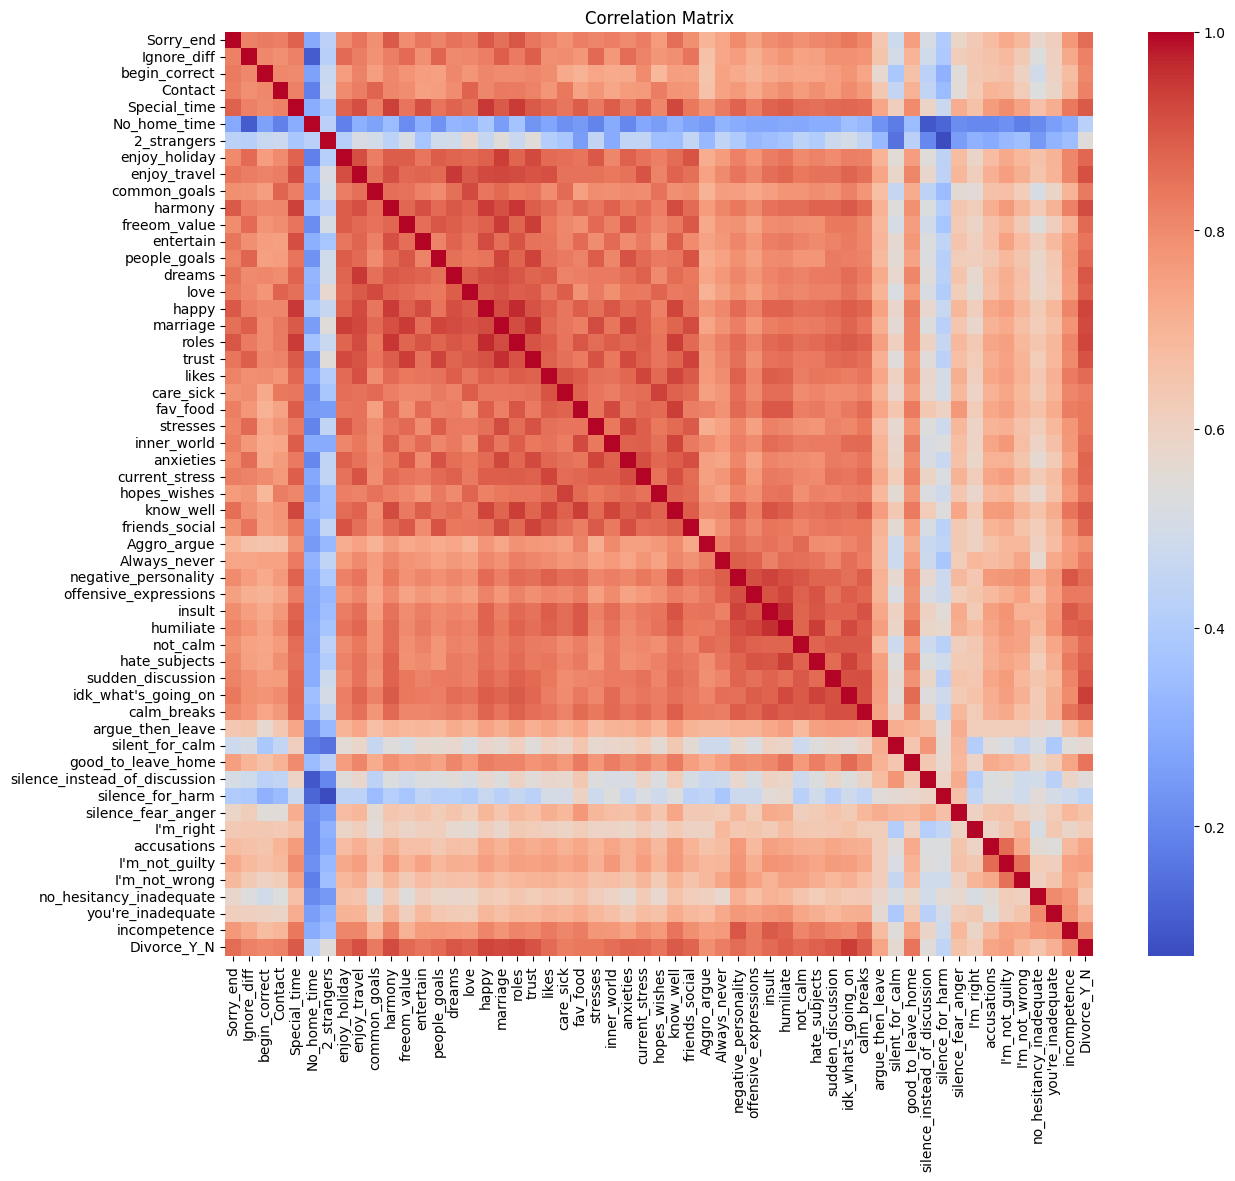

In [14]:
## Descriptive Analyses 
correlation_matrix = data.corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

To explore the relationships between the variables, a correlation plot was created.

The results align with our initial assumptions: most variables show strong correlations, as indicated by the deep blue hues in the plot. Notably, two variables—"stranger time" and "no home time"—exhibit weaker correlations, represented by lighter blue shades. Upon quantifying the correlations, we identified 41 variables with averagecorrelations exceeding 0.7 and 11 variables below this threshold. The weakest average correlation, at 0.26, corresponds to "no home time."

These findings confirm our expectations, demonstrating that the dataset is predominantly characterized by strong inter-variable correlations.

In [40]:

# Compute the mean correlation for each variable, excluding self-correlations (diagonal values)
mean_correlations = correlation_matrix.apply(lambda x: (x.sum() - x[x.name]) / (len(x) - 1))

# Display variables with mean correlations less than 0.7
low_corr_var = mean_correlations[mean_correlations < 0.7]

# Display variables with mean correlations greater than 0.7
high_corr_var = mean_correlations[mean_correlations > 0.7]

print(f"Number of low correlated variables: {low_corr_var.count()}")
print(f"Number of highly correlated variables: {high_corr_var.count()}")
print(f"Weakest corraleted variable: {mean_correlations.idxmin()} with value: {mean_correlations.min()}")

Number of low correlated variables: 14
Number of highly correlated variables: 41
Weakest corraleted variable: No_home_time with value: 0.2629620065293393


# Research question
How do Support Vector Machines and Bayesian logistic regression compare to existing neural network and Random Forest methods in predicting divorce based on marital satisfaction, communication patterns, and compatibility?

# SVM why appropiate?
- SVM (with an RBF kernel) is well-suited for datasets with correlated features, as it projects the data into a higher-dimensional space where correlations are less problematic.
- SVM is particularly effective for binary classification tasks, like your Divorce_Y/N variable, and aims to find a decision boundary that maximizes the margin between classes.
- SVMs perform well even with a large number of predictors,

# Why Bayesian?
- Bayesian logistic regression with a Gaussian or Laplace prior effectively regularizes coefficients and prevents overfitting caused by multicollinearity.
- Unlike SVM, Bayesian regression allows for interpreting the posterior distributions of coefficients. This is valuable for understanding which factors (e.g., communication patterns or compatibility) contribute most to predicting divorce.
- If you have prior knowledge about which variables might be more influential, Bayesian regression allows you to incorporate this information through the prior distribution.
- (Decide on prior la place for lasso and Gaussian for ridge)We could choose La place for increased interpetability 

Strengths of Combining the Two Approaches
You can leverage the strengths of both models:

Use Bayesian regression to identify the most important predictors and interpret their relationships with divorce.
Use SVM (with an RBF kernel) as a benchmark model to test the predictive performance of your dataset in a purely machine-learning-based framework.

# Project Outline/to do

## Model comparison
- Train Bayesian logistic regression and SVM on dataset
- Compare models using metrics like accuracy, precision, recall, F1 score, and AUC ROC

## Interpretation
- Use Bayesian regression to explain the relationships between predictors and divorce outcomes.
- Use SVM to benchmark the predictive performance and validate the findings.